In [110]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler


In [111]:
# Load Boston Data Set from sklearn.datasets

In [112]:
dataset = load_boston()

/Users/charles/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing 

In [113]:
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## Assign data to X and target to y

In [114]:
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)

In [115]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [116]:
y = pd.DataFrame(dataset.target)
y = y.rename({0:"Result"}, axis=1)

In [117]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Check the shape of the dataset

I am adding more to this including checking the shape, datatypes and the basic statistics
and correlation

In [118]:
print("X.shape = ", X.shape, " Y.shape", y.shape)

X.shape =  (506, 13)  Y.shape (506, 1)


In [119]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [120]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Result  506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [121]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Plot the scatter plot of each attribute versus MEDV

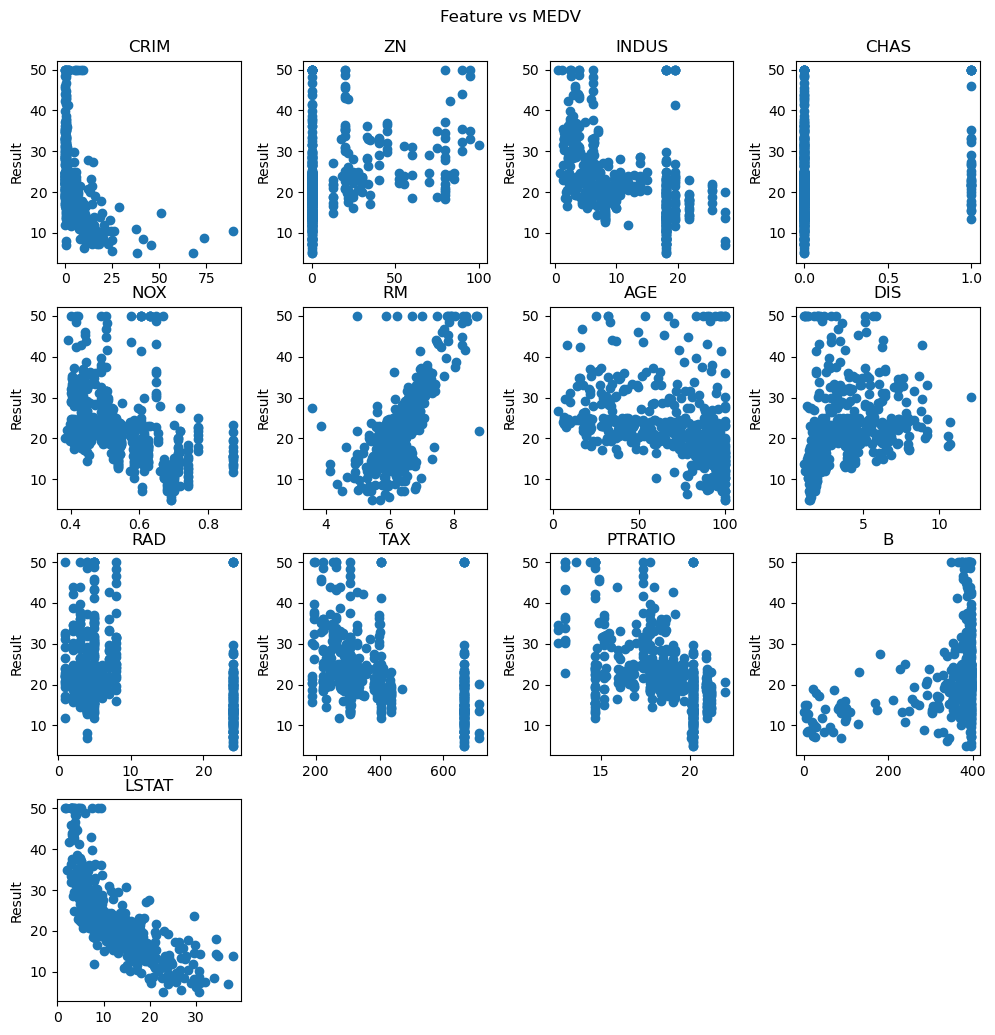

In [134]:
(fig, axes) = plt.subplots(4,4, figsize=(10,10))
plt.tight_layout()
plt.suptitle("Feature vs MEDV", y=1.03)

all_ax = list(np.ravel(axes))

for ax in all_ax:
    ax.set_visible(False)

for (index, column) in enumerate(X):
    all_ax[index].set_visible(True)
    all_ax[index].set_title(column)
    all_ax[index].set_ylabel("Result")
    all_ax[index].scatter(X[column],y)

In [123]:
#Split the dataset into test and train datasets
(X_train, X_test, y_train, y_test ) = train_test_split(X,y,test_size=.25, random_state=42)

## run cross validation for the train and test datasets for cv=10

print the mean score for the cross validation using linear regressor (LinearRegressor())

<b>What is cross_val_score</b>
The cross_val_score() has cv values ( default is 10 ) for each fold of the data.  By 
getting more scores, the developer can better understand how the model will perform
on unseen data.

In [124]:
scores = cross_val_score(LinearRegression(), X_train,y_train,cv=10)
print("mean = ", np.mean(scores), "std = ",np.std(scores))
print("all of the scores = ", scores)


mean =  0.716013319664838 std =  0.09275504601337771
all of the scores =  [0.7832738  0.70313102 0.55559062 0.7328346  0.82883292 0.699766
 0.80487399 0.71770265 0.78880787 0.54531972]


## Boston Housing Data with Polynomials

Transform the Boston House dataset and split the dataset into test and train datasets<br>
Run cross-validation<br>
Plot the coefficients of the model<br>

I already have the Boston House dataset and it is split

In [125]:
# Preprocess the data
poly = PolynomialFeatures(2, include_bias=False)
X_polyTrainData = poly.fit_transform(X_train)
X_train.shape, X_polyTrainData.shape

((379, 13), (379, 104))

In [132]:
# Take a look at the count values and see if there are any missing 
# values.  It seems there were none.

for column in X.columns:
    print ("Column: ", column, "====================================")
    if column.isnumeric():
       # print(X[column].value_counts(bins=2000, dropna=True))
       pass
    else:
        print(X[column].value_counts(dropna=True, bins=5))
    print("========================================================");
        

Column:  CRIM ====================================
(-0.08360000000000001, 17.8]    483
(17.8, 35.594]                   15
(35.594, 53.388]                  5
(71.182, 88.976]                  2
(53.388, 71.182]                  1
Name: CRIM, dtype: int64
Column:  ZN ====================================
(-0.101, 20.0]    405
(20.0, 40.0]       50
(60.0, 80.0]       21
(40.0, 60.0]       16
(80.0, 100.0]      14
Name: ZN, dtype: int64
Column:  INDUS ====================================
(16.828, 22.284]    177
(0.432, 5.916]      151
(5.916, 11.372]     143
(11.372, 16.828]     23
(22.284, 27.74]      12
Name: INDUS, dtype: int64
Column:  CHAS ====================================
(-0.002, 0.2]    471
(0.8, 1.0]        35
(0.2, 0.4]         0
(0.4, 0.6]         0
(0.6, 0.8]         0
Name: CHAS, dtype: int64
Column:  NOX ====================================
(0.384, 0.482]    155
(0.482, 0.579]    149
(0.579, 0.677]    108
(0.677, 0.774]     78
(0.774, 0.871]     16
Name: NOX, dtype: int64

In [127]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [128]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [129]:
# Run the cross validation 
scalar = StandardScaler()
X_normalized_Data = scalar.fit_transform(X_polyTrainData,None)
scores = cross_val_score(LinearRegression(), X_normalized_Data, y_train, cv=10)
print("mean = ", np.mean(scores), "std = ",np.std(scores))

mean =  0.8065194743874027 std =  0.10074510814665205


ceofficients =  1


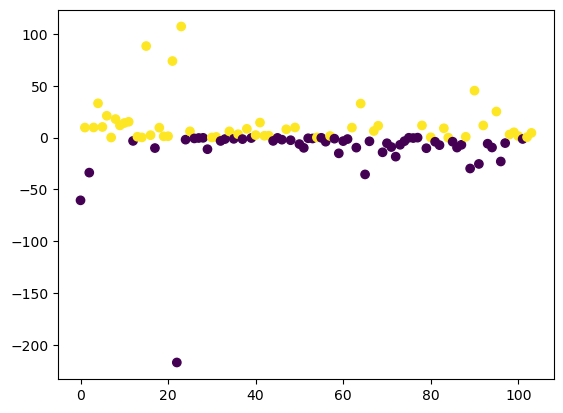

In [130]:
print("ceofficients = ", len(linear_regression.coef_))
linear_regression = LinearRegression().fit(X_normalized_Data, y_train)
plt.scatter(range(X_normalized_Data.shape[1]), \
            linear_regression.coef_, \
            c=np.sign(linear_regression.coef_))
